# Dekk Hackathon

Notebook plotting maps of the countries provided in the */data/* folder.

In [69]:
ROOT_OF_DEKKHACKATHON = '/home/gartin/Desktop/CloudStorage/Projects/DekkHackathon'

In [70]:
import os
print(os.getcwd())
os.chdir(ROOT_OF_DEKKHACKATHON)
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
print(os.getcwd())

/home/gartin/Desktop/CloudStorage/Projects/DekkHackathon
/home/gartin/Desktop/CloudStorage/Projects/DekkHackathon


## Collect all the files
Create a convenient dictionary collecting all shapefiles and their paths. 

dict_countries = {'path'}

In [71]:
# get inside data directory
dir_data = Path(ROOT_OF_DEKKHACKATHON,'data/maps')

# get all subdirectories representing countries
dict_countries = {}
for file in os.listdir(dir_data):
    d = os.path.join(dir_data, file)
    if os.path.isdir(d):
        dict_countries[file] = {'path': d, 'shapefiles':dict()}

shapefile_counter = 0
country_counter = 0
# loop through subdirectories and get all paths to shapefiles
# careful, not every country has 5 levels of administrative regions!
shapefile_folders = ['1st_level_administrative_divisions',
                     '2nd_level_administrative_divisions',
                     '3rd_level_administrative_divisions',
                     '4th_level_administrative_divisions',
                     '5th_level_administrative_divisions']
for country in dict_countries.keys():
    country_counter += 1
    # get path to data
    country_path = dict_countries[country]['path']
    # loop through shapefiles accoding to resolution (not all are present, therefore check)
    for idx_shapefile, shapefile_folder in enumerate(shapefile_folders):
        shapefile_folder_path = Path(country_path, shapefile_folder)
        shapefile_resolution = int(shapefile_folder[0])
        if os.path.isdir(shapefile_folder_path):
            # get full path
            shapefile_path = Path(shapefile_folder_path, country+'_adm'+str(shapefile_resolution)+'.shp')
            # check whether shapefile exists
            if os.path.isfile(shapefile_path):
                # keep the path
                dict_countries[country]['shapefiles'][idx_shapefile] = shapefile_path
                shapefile_counter += 1
            else:
                print('ERROR: There should be shapefile '+country+'_adm'+str(shapefile_resolution)+'.shp'+' inside '+str(shapefile_folder_path)+'.')
        else:
            print(country+' doens\'t have '+str(shapefile_resolution)+'. level of shapfile ')

            
print('Therre is '+str(shapefile_counter)+' valid shapefiles from '+str(country_counter)+' coutries.')

DEU doens't have 5. level of shapfile 
SVK doens't have 3. level of shapfile 
SVK doens't have 4. level of shapfile 
SVK doens't have 5. level of shapfile 
HUN doens't have 3. level of shapfile 
HUN doens't have 4. level of shapfile 
HUN doens't have 5. level of shapfile 
AUT doens't have 4. level of shapfile 
AUT doens't have 5. level of shapfile 
ITA doens't have 4. level of shapfile 
ITA doens't have 5. level of shapfile 
CZE doens't have 3. level of shapfile 
CZE doens't have 4. level of shapfile 
CZE doens't have 5. level of shapfile 
BEL doens't have 5. level of shapfile 
POL doens't have 3. level of shapfile 
POL doens't have 4. level of shapfile 
POL doens't have 5. level of shapfile 
UKR doens't have 3. level of shapfile 
UKR doens't have 4. level of shapfile 
UKR doens't have 5. level of shapfile 
Therre is 29 valid shapefiles from 10 coutries.


## Plot all shapefiles

Loop through collected paths, load the data and plot the shapefiles.

FINISHED


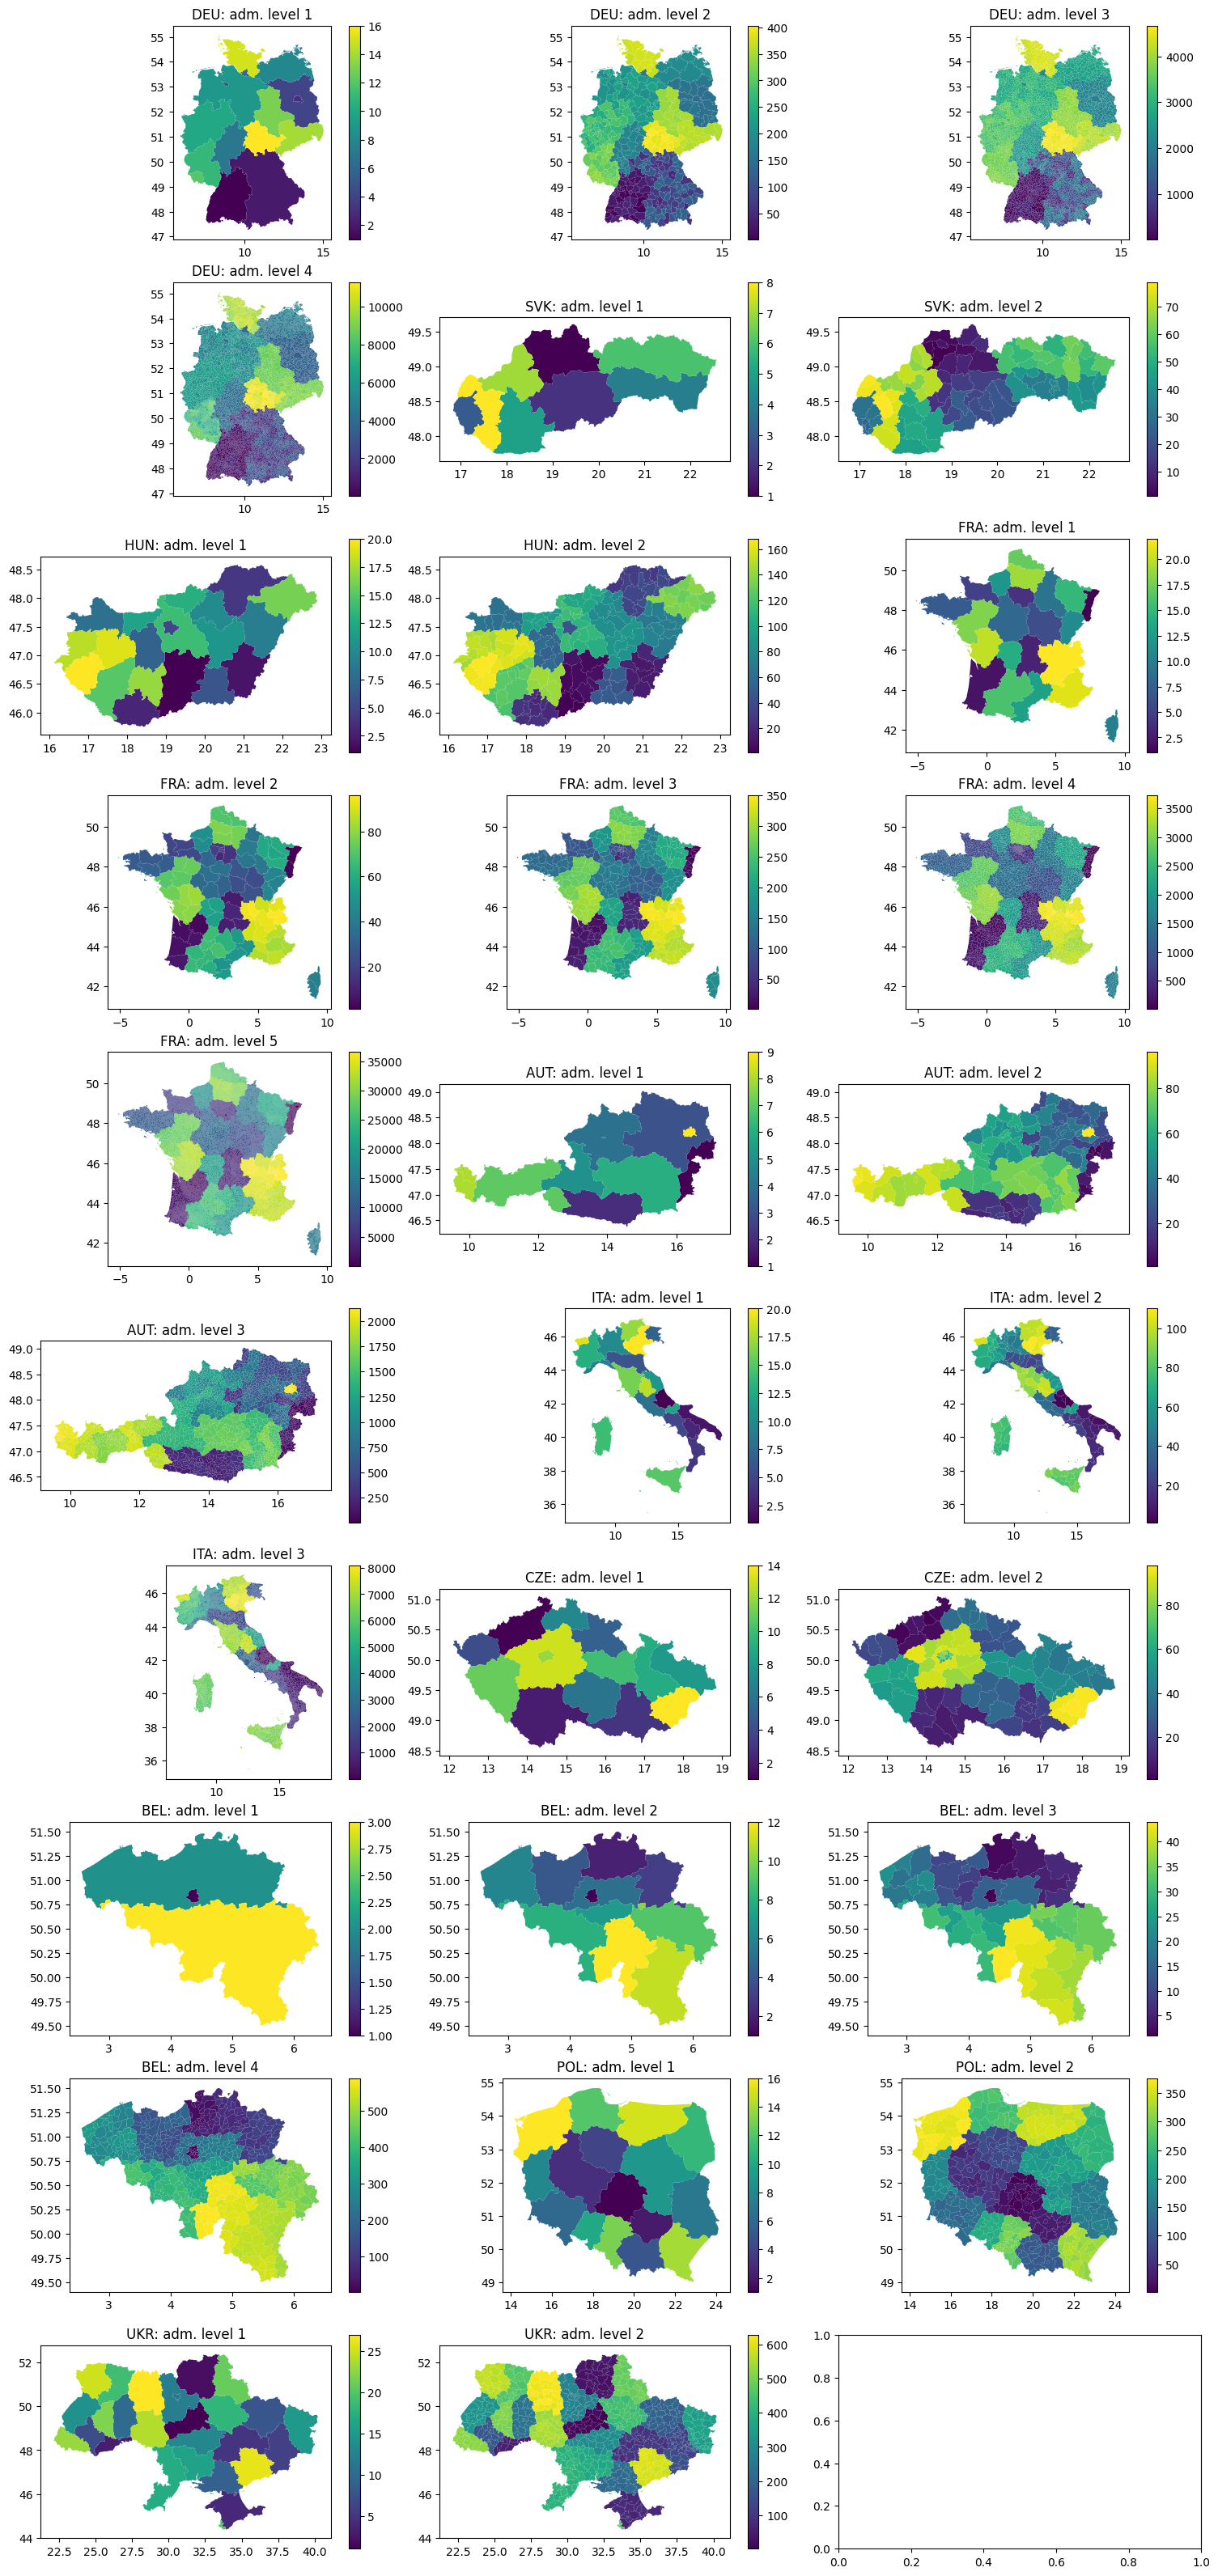

In [78]:
fig, axs = plt.subplots(10, 3, figsize = (18.5, 40.5))
axs = axs.flatten()

axs_counter = 0
for country in dict_countries.keys():
    for shapefile_level in dict_countries[country]['shapefiles'].keys():
        # get shapefile
        shapefile_path = dict_countries[country]['shapefiles'][shapefile_level]
        df = gpd.read_file(shapefile_path)
        # plot
        ax=axs[axs_counter]
        axs_counter += 1
        # get highest level of ID
        for id_level in [5, 4, 3, 2, 1, 0]:
            if 'ID_'+str(id_level) in df.columns:
                df.plot(column='ID_'+str(id_level),ax=ax, legend=True)
                break
        ax.set_title(country+': adm. level '+str(shapefile_level+1))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
print('FINISHED')
fig.savefig('universal_shapefiles.png', bbox_inches='tight')

## Additional plot of Slovakia using shapefile from Geoportal.sk

In [73]:
# get inside data directory
shp_svk = Path(ROOT_OF_DEKKHACKATHON,'data/maps/SVK/ah_gpkg_3/USJ_hranice_3.gpkg')
# load df
df_svk = gpd.read_file(shp_svk)

/home/gartin/Desktop/CloudStorage/Projects/DekkHackathon


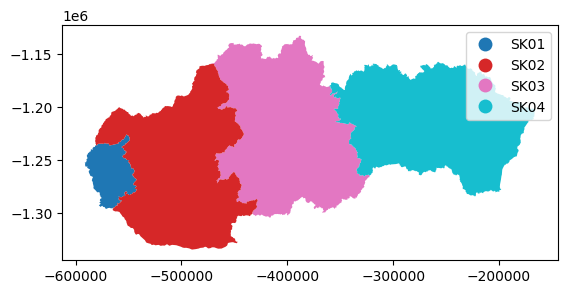

In [77]:
fig, ax = plt.subplots(1, 1)
svk_parts = df_svk.dissolve(by='NUTS2')
svk_parts.plot(column='NUTS2_CODE', ax=ax, legend=True)
fig.savefig('slovak_shapefile_0.png', bbox_inches='tight')

<AxesSubplot:>

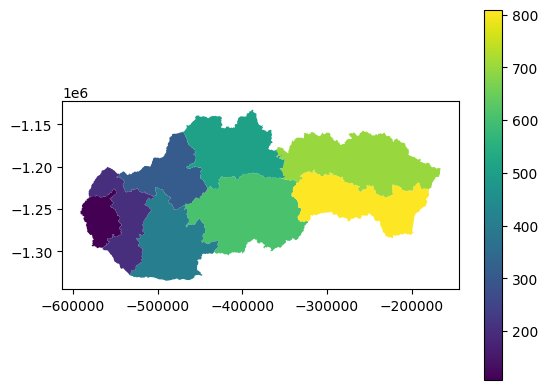

In [67]:
fig, ax = plt.subplots(1, 1)
svk_regions = df_svk.dissolve(by='NUTS3')
svk_regions.plot(column='IDN3', ax=ax, legend=True)

<AxesSubplot:>

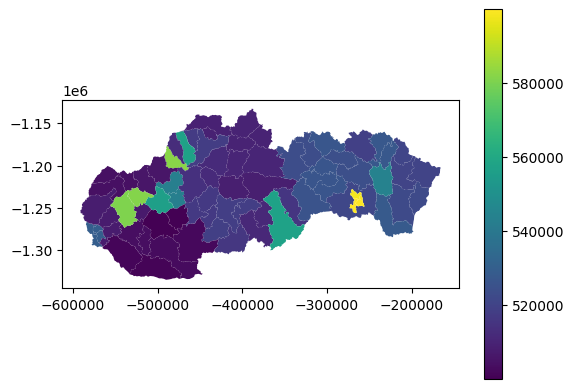

In [68]:
fig, ax = plt.subplots(1, 1)
svk_districts = df_svk.dissolve(by='NM3')
svk_districts.plot(column='IDN4', ax=ax, legend=True)